# Regresion lineal simple

## El paquete stats model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = '/home/giovannyencinia/Documents/datasets/MACHINE_LEARNING_course'
path = root + '/ads/Advertising.csv'
ads = pd.read_csv(path)
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
import statsmodels.formula.api as smf

In [4]:
lm = smf.ols(formula = 'Sales~TV', data = ads).fit()

In [5]:
print(f"Los p-vlores son \n{lm.pvalues}")
lm.summary()

Los p-vlores son 
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        20:51:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales =  7.032594 + 0.047537*TV

In [7]:
X = ads.TV
y_validate = 7.032594 + 0.047537*X

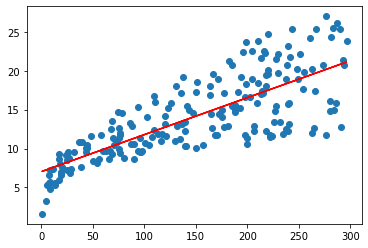

In [8]:
plt.scatter(ads.TV, ads.Sales)
plt.plot(X, y_validate, 'r');

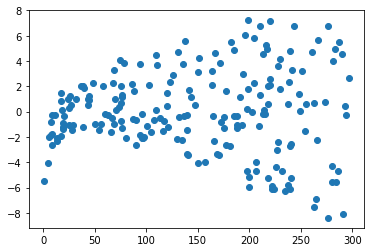

In [23]:
error_abs = -y_validate + ads.Sales
plt.scatter(X, error_abs)

# Regresion lineal multiple

## Stats model para regresion multiple

Comenzaremos añadiendo mas variables predictoras (método constructivo)

In [40]:
lm2 = smf.ols(formula = 'Sales~TV+Newspaper', data = ads).fit()

In [41]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [42]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

sales = 5.774948 + ads.TV * 0.046901 + ads.Newspaper * 0.044219

In [47]:
lm2.rsquared

0.6458354938293271

In [46]:
lm2.rsquared_adj

0.6422399150864777

In [48]:
sales_pred = lm2.predict(ads[['TV', 'Newspaper']])

In [49]:
lm3 = smf.ols(formula = 'Sales~TV+Radio', data = ads).fit()

In [53]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        12:27:22   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
sales_pred2 = lm3.predict(ads[['TV', 'Radio']])

In [57]:
SSD = np.sum((ads.Sales - sales_pred2)**2)
RSE = np.sqrt(SSD/(ads.shape[0] - 3))

In [58]:
RSE

1.681360912508001

In [59]:
lm4 = smf.ols(formula = 'Sales~TV+Radio+Newspaper', data = ads).fit()

In [60]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        12:32:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicolinealidad

### Factor inflacion de varianza
VIF = 1; Las variables no estan correlacionadas

VIF (1, 5) levemente correlacionada

VIF > 5 altamente correlacionadas y se elimina del método

In [65]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
linearmodel_n = smf.ols(formula = 'Newspaper~TV+Radio', data = ads).fit()
R_2_n = linearmodel_n.rsquared
VIF = 1/(1 - R_2_n)
print(f"El VIF es {VIF}")

El VIF es 1.1451873787239288


In [67]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
linearmodel_t = smf.ols(formula='TV~Newspaper+Radio', data=ads).fit()
R_2_t = linearmodel_t.rsquared
VIF = 1/(1 - R_2_t)
print(f"El VIF es {VIF}")

El VIF es 1.0046107849396502


In [69]:
# Radio ~ Newspaper + Tv -> R^2 VIF = 1/(1-R^2)
linearmodel_r = smf.ols(formula='Radio~Newspaper+TV', data=ads).fit()
R_2_r = linearmodel_r.rsquared
VIF = 1/(1 - R_2_r)
print(f"El VIF es {VIF}")

El VIF es 1.1449519171055353
